In [1]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt

In [2]:
sample = pd.read_csv("example_test_files/sample_submission.csv")
sample.head()

,Date,SecuritiesCode,Rank
0,2021-12-06,1301,0
1,2021-12-06,1332,1
2,2021-12-06,1333,2
3,2021-12-06,1375,3
4,2021-12-06,1376,4


In [3]:
sample.nunique()

Date                56
SecuritiesCode    2000
Rank              2000
dtype: int64

In [4]:
stock_prices = pd.read_csv("train_files/stock_prices.csv")
stock_prices["Date"] = pd.to_datetime(stock_prices["Date"])
stock_prices

,RowId,Date,SecuritiesCode,Open,High,Low,Close,Volume,AdjustmentFactor,ExpectedDividend,SupervisionFlag,Target
0,20170104_1301,2017-01-04,1301,2734.0,2755.0,2730.0,2742.0,31400,1.0,NaN,False,0.000730
1,20170104_1332,2017-01-04,1332,568.0,576.0,563.0,571.0,2798500,1.0,NaN,False,0.012324
2,20170104_1333,2017-01-04,1333,3150.0,3210.0,3140.0,3210.0,270800,1.0,NaN,False,0.006154
3,20170104_1376,2017-01-04,1376,1510.0,1550.0,1510.0,1550.0,11300,1.0,NaN,False,0.011053
4,20170104_1377,2017-01-04,1377,3270.0,3350.0,3270.0,3330.0,150800,1.0,NaN,False,0.003026
...,...,...,...,...,...,...,...,...,...,...,...,...
2332526,20211203_9990,2021-12-03,9990,514.0,528.0,513.0,528.0,44200,1.0,NaN,False,0.034816
2332527,20211203_9991,2021-12-03,9991,782.0,794.0,782.0,794.0,35900,1.0,NaN,False,0.025478
2332528,20211203_9993,2021-12-03,9993,1690.0,1690.0,1645.0,1645.0,7200,1.0,NaN,False,-0.004302
2332529,20211203_9994,2021-12-03,9994,2388.0,2396.0,2380.0,2389.0,6500,1.0,NaN,False,0.009098


In [5]:
tmpdf = stock_prices[stock_prices["SecuritiesCode"]==1301].reset_index(drop=True)
tmpdf.head(3) 

,RowId,Date,SecuritiesCode,Open,High,Low,Close,Volume,AdjustmentFactor,ExpectedDividend,SupervisionFlag,Target
0,20170104_1301,2017-01-04,1301,2734.0,2755.0,2730.0,2742.0,31400,1.0,NaN,False,0.000730
1,20170105_1301,2017-01-05,1301,2743.0,2747.0,2735.0,2738.0,17900,1.0,NaN,False,0.002920
2,20170106_1301,2017-01-06,1301,2734.0,2744.0,2720.0,2740.0,19900,1.0,NaN,False,-0.001092


In [6]:
tmpdf["Close_shift1"] = tmpdf["Close"].shift(-1)
tmpdf["Close_shift2"] = tmpdf["Close"].shift(-2)

tmpdf["rate"] = (tmpdf["Close_shift2"] - tmpdf["Close_shift1"]) / tmpdf["Close_shift1"]
tmpdf.head()

,RowId,Date,SecuritiesCode,Open,High,Low,Close,Volume,AdjustmentFactor,ExpectedDividend,SupervisionFlag,Target,Close_shift1,Close_shift2,rate
0,20170104_1301,2017-01-04,1301,2734.0,2755.0,2730.0,2742.0,31400,1.0,NaN,False,0.000730,2738.0,2740.0,0.000730
1,20170105_1301,2017-01-05,1301,2743.0,2747.0,2735.0,2738.0,17900,1.0,NaN,False,0.002920,2740.0,2748.0,0.002920
2,20170106_1301,2017-01-06,1301,2734.0,2744.0,2720.0,2740.0,19900,1.0,NaN,False,-0.001092,2748.0,2745.0,-0.001092
3,20170110_1301,2017-01-10,1301,2745.0,2754.0,2735.0,2748.0,24200,1.0,NaN,False,-0.005100,2745.0,2731.0,-0.005100
4,20170111_1301,2017-01-11,1301,2748.0,2752.0,2737.0,2745.0,9300,1.0,NaN,False,-0.003295,2731.0,2722.0,-0.003295


## Rank calc

In [7]:
stock_prices.head(3)

,RowId,Date,SecuritiesCode,Open,High,Low,Close,Volume,AdjustmentFactor,ExpectedDividend,SupervisionFlag,Target
0,20170104_1301,2017-01-04,1301,2734.0,2755.0,2730.0,2742.0,31400,1.0,NaN,False,0.000730
1,20170104_1332,2017-01-04,1332,568.0,576.0,563.0,571.0,2798500,1.0,NaN,False,0.012324
2,20170104_1333,2017-01-04,1333,3150.0,3210.0,3140.0,3210.0,270800,1.0,NaN,False,0.006154


In [8]:
tmpdf2 = stock_prices[stock_prices["Date"]=="2021-12-02"].reset_index(drop=True)
tmpdf2

,RowId,Date,SecuritiesCode,Open,High,Low,Close,Volume,AdjustmentFactor,ExpectedDividend,SupervisionFlag,Target
0,20211202_1301,2021-12-02,1301,2949.0,2973.0,2933.0,2933.0,15200,1.0,NaN,False,-0.003689
1,20211202_1332,2021-12-02,1332,566.0,577.0,565.0,573.0,1525800,1.0,NaN,False,0.006838
2,20211202_1333,2021-12-02,1333,2276.0,2314.0,2267.0,2303.0,157000,1.0,NaN,False,0.008058
3,20211202_1375,2021-12-02,1375,1220.0,1244.0,1209.0,1212.0,121600,1.0,NaN,False,-0.008907
4,20211202_1376,2021-12-02,1376,1353.0,1373.0,1327.0,1327.0,7800,1.0,NaN,False,0.014264
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,20211202_9990,2021-12-02,9990,518.0,519.0,507.0,507.0,109500,1.0,NaN,False,-0.020833
1996,20211202_9991,2021-12-02,9991,777.0,791.0,775.0,778.0,46600,1.0,NaN,False,-0.011335
1997,20211202_9993,2021-12-02,9993,1672.0,1685.0,1650.0,1650.0,6900,1.0,NaN,False,-0.010942
1998,20211202_9994,2021-12-02,9994,2340.0,2382.0,2340.0,2362.0,9200,1.0,NaN,False,0.012139


In [9]:
tmpdf2["rank"] = tmpdf2["Target"].rank(ascending=False,method="first") -1 
tmpdf2 = tmpdf2.sort_values("rank").reset_index(drop=True)

In [10]:
tmpdf2

,RowId,Date,SecuritiesCode,Open,High,Low,Close,Volume,AdjustmentFactor,ExpectedDividend,SupervisionFlag,Target,rank
0,20211202_4699,2021-12-02,4699,2037.0,2149.0,2037.0,2143.0,31000,1.0,NaN,False,0.231481,0.0
1,20211202_4488,2021-12-02,4488,5900.0,5990.0,5690.0,5700.0,57100,1.0,NaN,False,0.149254,1.0
2,20211202_8057,2021-12-02,8057,4710.0,4820.0,4615.0,4640.0,29800,1.0,NaN,False,0.123110,2.0
3,20211202_9632,2021-12-02,9632,8110.0,8150.0,8000.0,8030.0,3900,1.0,NaN,False,0.107011,3.0
4,20211202_6958,2021-12-02,6958,510.0,525.0,502.0,517.0,639200,1.0,NaN,False,0.103113,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,20211202_4483,2021-12-02,4483,8200.0,8590.0,8180.0,8410.0,320300,1.0,NaN,False,-0.085480,1995.0
1996,20211202_6879,2021-12-02,6879,731.0,745.0,702.0,707.0,735500,1.0,NaN,False,-0.087248,1996.0
1997,20211202_4168,2021-12-02,4168,4280.0,4390.0,4200.0,4335.0,72600,1.0,NaN,False,-0.094595,1997.0
1998,20211202_3994,2021-12-02,3994,7490.0,7500.0,7060.0,7070.0,735000,1.0,NaN,False,-0.094980,1998.0


## Calculation of daily spread return of this day

In [11]:
tmpdf2_top200 = tmpdf2.iloc[:200,:]
tmpdf2_top200

,RowId,Date,SecuritiesCode,Open,High,Low,Close,Volume,AdjustmentFactor,ExpectedDividend,SupervisionFlag,Target,rank
0,20211202_4699,2021-12-02,4699,2037.0,2149.0,2037.0,2143.0,31000,1.0,NaN,False,0.231481,0.0
1,20211202_4488,2021-12-02,4488,5900.0,5990.0,5690.0,5700.0,57100,1.0,NaN,False,0.149254,1.0
2,20211202_8057,2021-12-02,8057,4710.0,4820.0,4615.0,4640.0,29800,1.0,NaN,False,0.123110,2.0
3,20211202_9632,2021-12-02,9632,8110.0,8150.0,8000.0,8030.0,3900,1.0,NaN,False,0.107011,3.0
4,20211202_6958,2021-12-02,6958,510.0,525.0,502.0,517.0,639200,1.0,NaN,False,0.103113,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,20211202_6272,2021-12-02,6272,1291.0,1343.0,1291.0,1308.0,23900,1.0,NaN,False,0.012734,195.0
196,20211202_6324,2021-12-02,6324,4500.0,4635.0,4400.0,4490.0,417100,1.0,NaN,False,0.012698,196.0
197,20211202_2899,2021-12-02,2899,1899.0,1919.0,1880.0,1906.0,39400,1.0,NaN,False,0.012697,197.0
198,20211202_2185,2021-12-02,2185,1376.0,1376.0,1355.0,1355.0,200,1.0,NaN,False,0.012687,198.0


In [12]:
weights = np.linspace(start=2, stop=1, num=200)
weights[:5]

array([2.        , 1.99497487, 1.98994975, 1.98492462, 1.9798995 ])

In [13]:
tmpdf2_top200["weights"] = weights
tmpdf2_top200.head(3)

C:\Users\79222\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,RowId,Date,SecuritiesCode,Open,High,Low,Close,Volume,AdjustmentFactor,ExpectedDividend,SupervisionFlag,Target,rank,weights
0,20211202_4699,2021-12-02,4699,2037.0,2149.0,2037.0,2143.0,31000,1.0,NaN,False,0.231481,0.0,2.000000
1,20211202_4488,2021-12-02,4488,5900.0,5990.0,5690.0,5700.0,57100,1.0,NaN,False,0.149254,1.0,1.994975
2,20211202_8057,2021-12-02,8057,4710.0,4820.0,4615.0,4640.0,29800,1.0,NaN,False,0.123110,2.0,1.989950


In [14]:
tmpdf2_top200["calc_weights"] = tmpdf2_top200["Target"] * tmpdf2_top200["weights"]
tmpdf2_top200.head(3)

C:\Users\79222\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,RowId,Date,SecuritiesCode,Open,High,Low,Close,Volume,AdjustmentFactor,ExpectedDividend,SupervisionFlag,Target,rank,weights,calc_weights
0,20211202_4699,2021-12-02,4699,2037.0,2149.0,2037.0,2143.0,31000,1.0,NaN,False,0.231481,0.0,2.000000,0.462963
1,20211202_4488,2021-12-02,4488,5900.0,5990.0,5690.0,5700.0,57100,1.0,NaN,False,0.149254,1.0,1.994975,0.297757
2,20211202_8057,2021-12-02,8057,4710.0,4820.0,4615.0,4640.0,29800,1.0,NaN,False,0.123110,2.0,1.989950,0.244983


In [15]:
Sup = tmpdf2_top200["calc_weights"].sum()/np.mean(weights)
Sup

5.806640386677844

In [16]:
tmpdf2_bottom200 = tmpdf2.iloc[-200:,:]
tmpdf2_bottom200 = tmpdf2_bottom200.sort_values("rank",ascending = False).reset_index(drop=True)
tmpdf2_bottom200.head()

,RowId,Date,SecuritiesCode,Open,High,Low,Close,Volume,AdjustmentFactor,ExpectedDividend,SupervisionFlag,Target,rank
0,20211202_4169,2021-12-02,4169,7160.0,7870.0,7110.0,7520.0,783000,1.0,NaN,False,-0.127424,1999.0
1,20211202_3994,2021-12-02,3994,7490.0,7500.0,7060.0,7070.0,735000,1.0,NaN,False,-0.094980,1998.0
2,20211202_4168,2021-12-02,4168,4280.0,4390.0,4200.0,4335.0,72600,1.0,NaN,False,-0.094595,1997.0
3,20211202_6879,2021-12-02,6879,731.0,745.0,702.0,707.0,735500,1.0,NaN,False,-0.087248,1996.0
4,20211202_4483,2021-12-02,4483,8200.0,8590.0,8180.0,8410.0,320300,1.0,NaN,False,-0.085480,1995.0


In [17]:
tmpdf2_bottom200["weights"] = weights
tmpdf2_bottom200.head(3)

,RowId,Date,SecuritiesCode,Open,High,Low,Close,Volume,AdjustmentFactor,ExpectedDividend,SupervisionFlag,Target,rank,weights
0,20211202_4169,2021-12-02,4169,7160.0,7870.0,7110.0,7520.0,783000,1.0,NaN,False,-0.127424,1999.0,2.000000
1,20211202_3994,2021-12-02,3994,7490.0,7500.0,7060.0,7070.0,735000,1.0,NaN,False,-0.094980,1998.0,1.994975
2,20211202_4168,2021-12-02,4168,4280.0,4390.0,4200.0,4335.0,72600,1.0,NaN,False,-0.094595,1997.0,1.989950


In [18]:
tmpdf2_bottom200["calc_weights"] = tmpdf2_bottom200["Target"] * tmpdf2_bottom200["weights"]
tmpdf2_bottom200.head(3)

,RowId,Date,SecuritiesCode,Open,High,Low,Close,Volume,AdjustmentFactor,ExpectedDividend,SupervisionFlag,Target,rank,weights,calc_weights
0,20211202_4169,2021-12-02,4169,7160.0,7870.0,7110.0,7520.0,783000,1.0,NaN,False,-0.127424,1999.0,2.000000,-0.254848
1,20211202_3994,2021-12-02,3994,7490.0,7500.0,7060.0,7070.0,735000,1.0,NaN,False,-0.094980,1998.0,1.994975,-0.189482
2,20211202_4168,2021-12-02,4168,4280.0,4390.0,4200.0,4335.0,72600,1.0,NaN,False,-0.094595,1997.0,1.989950,-0.188238


In [19]:
Sdown = tmpdf2_bottom200["calc_weights"].sum()/np.mean(weights)
Sdown

-9.10891259103055

## Calculate daily spread return

In [20]:
daily_spread_return = Sup - Sdown
daily_spread_return

14.915552977708394

## Case verification

In [22]:
idcount = stock_prices.groupby("Date")["SecuritiesCode"].count().reset_index()
idcount

,Date,SecuritiesCode
0,2017-01-04,1865
1,2017-01-05,1865
2,2017-01-06,1865
3,2017-01-10,1865
4,2017-01-11,1865
...,...,...
1197,2021-11-29,2000
1198,2021-11-30,2000
1199,2021-12-01,2000
1200,2021-12-02,2000


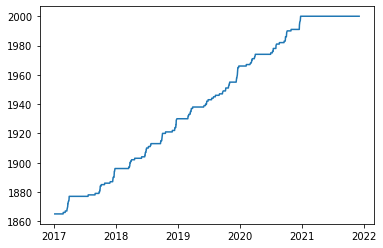

In [23]:
plt.plot(idcount["Date"],idcount["SecuritiesCode"])

In [24]:
idcount.loc[idcount["SecuritiesCode"]==2000,:]

,Date,SecuritiesCode
970,2020-12-23,2000
971,2020-12-24,2000
972,2020-12-25,2000
973,2020-12-28,2000
974,2020-12-29,2000
...,...,...
1197,2021-11-29,2000
1198,2021-11-30,2000
1199,2021-12-01,2000
1200,2021-12-02,2000


In [25]:
stock_prices2 = stock_prices.loc[stock_prices["Date"]>= "2021-01-01"].reset_index(drop=True)
stock_prices2

,RowId,Date,SecuritiesCode,Open,High,Low,Close,Volume,AdjustmentFactor,ExpectedDividend,SupervisionFlag,Target
0,20210104_1301,2021-01-04,1301,2951.0,2951.0,2913.0,2950.0,9700,1.0,NaN,False,0.011502
1,20210104_1332,2021-01-04,1332,428.0,429.0,416.0,421.0,1780500,1.0,NaN,False,0.019093
2,20210104_1333,2021-01-04,1333,2229.0,2231.0,2179.0,2202.0,112400,1.0,NaN,False,0.015075
3,20210104_1375,2021-01-04,1375,1701.0,1701.0,1672.0,1674.0,67900,1.0,NaN,False,-0.003503
4,20210104_1376,2021-01-04,1376,1597.0,1597.0,1577.0,1588.0,4500,1.0,NaN,False,-0.012033
...,...,...,...,...,...,...,...,...,...,...,...,...
451995,20211203_9990,2021-12-03,9990,514.0,528.0,513.0,528.0,44200,1.0,NaN,False,0.034816
451996,20211203_9991,2021-12-03,9991,782.0,794.0,782.0,794.0,35900,1.0,NaN,False,0.025478
451997,20211203_9993,2021-12-03,9993,1690.0,1690.0,1645.0,1645.0,7200,1.0,NaN,False,-0.004302
451998,20211203_9994,2021-12-03,9994,2388.0,2396.0,2380.0,2389.0,6500,1.0,NaN,False,0.009098


In [27]:
stock_prices2["Rank"] = stock_prices2.groupby("Date")["Target"].rank(ascending=False,method="first") -1 
stock_prices2["Rank"] = stock_prices2["Rank"].astype("int") # floatだとエラー
stock_prices2

,RowId,Date,SecuritiesCode,Open,High,Low,Close,Volume,AdjustmentFactor,ExpectedDividend,SupervisionFlag,Target,Rank
0,20210104_1301,2021-01-04,1301,2951.0,2951.0,2913.0,2950.0,9700,1.0,NaN,False,0.011502,655
1,20210104_1332,2021-01-04,1332,428.0,429.0,416.0,421.0,1780500,1.0,NaN,False,0.019093,375
2,20210104_1333,2021-01-04,1333,2229.0,2231.0,2179.0,2202.0,112400,1.0,NaN,False,0.015075,497
3,20210104_1375,2021-01-04,1375,1701.0,1701.0,1672.0,1674.0,67900,1.0,NaN,False,-0.003503,1481
4,20210104_1376,2021-01-04,1376,1597.0,1597.0,1577.0,1588.0,4500,1.0,NaN,False,-0.012033,1737
...,...,...,...,...,...,...,...,...,...,...,...,...,...
451995,20211203_9990,2021-12-03,9990,514.0,528.0,513.0,528.0,44200,1.0,NaN,False,0.034816,580
451996,20211203_9991,2021-12-03,9991,782.0,794.0,782.0,794.0,35900,1.0,NaN,False,0.025478,1119
451997,20211203_9993,2021-12-03,9993,1690.0,1690.0,1645.0,1645.0,7200,1.0,NaN,False,-0.004302,1941
451998,20211203_9994,2021-12-03,9994,2388.0,2396.0,2380.0,2389.0,6500,1.0,NaN,False,0.009098,1768


In [29]:
import numpy as np
import pandas as pd


def calc_spread_return_sharpe(df: pd.DataFrame, portfolio_size: int = 200, toprank_weight_ratio: float = 2) -> float:
    """
    Args:
        df (pd.DataFrame): predicted results
        portfolio_size (int): # of equities to buy/sell
        toprank_weight_ratio (float): the relative weight of the most highly ranked stock compared to the least.
    Returns:
        (float): sharpe ratio
    """
    def _calc_spread_return_per_day(df, portfolio_size, toprank_weight_ratio):
        """
        Args:
            df (pd.DataFrame): predicted results
            portfolio_size (int): # of equities to buy/sell
            toprank_weight_ratio (float): the relative weight of the most highly ranked stock compared to the least.
        Returns:
            (float): spread return
        """
        assert df['Rank'].min() == 0
        assert df['Rank'].max() == len(df['Rank']) - 1
        weights = np.linspace(start=toprank_weight_ratio, stop=1, num=portfolio_size)
        purchase = (df.sort_values(by='Rank')['Target'][:portfolio_size] * weights).sum() / weights.mean()
        short = (df.sort_values(by='Rank', ascending=False)['Target'][:portfolio_size] * weights).sum() / weights.mean()
        return purchase - short

    buf = df.groupby('Date').apply(_calc_spread_return_per_day, portfolio_size, toprank_weight_ratio)
    sharpe_ratio = buf.mean() / buf.std()
    return sharpe_ratio

In [31]:
score = calc_spread_return_sharpe(stock_prices2, portfolio_size= 200, toprank_weight_ratio= 2)
score

5.790745682567136

# Обучение

In [33]:
stock_prices = pd.read_csv("train_files/stock_prices.csv")
stock_prices.head(3)

,RowId,Date,SecuritiesCode,Open,High,Low,Close,Volume,AdjustmentFactor,ExpectedDividend,SupervisionFlag,Target
0,20170104_1301,2017-01-04,1301,2734.0,2755.0,2730.0,2742.0,31400,1.0,NaN,False,0.000730
1,20170104_1332,2017-01-04,1332,568.0,576.0,563.0,571.0,2798500,1.0,NaN,False,0.012324
2,20170104_1333,2017-01-04,1333,3150.0,3210.0,3140.0,3210.0,270800,1.0,NaN,False,0.006154


<AxesSubplot:>

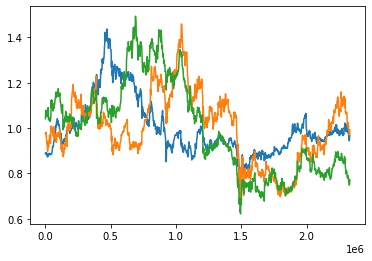

In [52]:
(stock_prices[stock_prices['SecuritiesCode']==1301]['Open']/stock_prices[stock_prices['SecuritiesCode']==1301]['Open'].mean()).plot()
(stock_prices[stock_prices['SecuritiesCode']==1332]['Open']/stock_prices[stock_prices['SecuritiesCode']==1332]['Open'].mean()).plot()
(stock_prices[stock_prices['SecuritiesCode']==1333]['Open']/stock_prices[stock_prices['SecuritiesCode']==1333]['Open'].mean()).plot()

In [54]:
trades_spec = pd.read_csv("data_specifications/trades_spec.csv")
trades_spec

,index,Column,Sample value,Type,Addendum,Remarks
0,0,PublishedDate,2017-01-13,date,NaN,"data published data, usually Thursday on the f..."
1,0,StartDate,2017-01-04,date,NaN,The first trading date in this trading week
2,1,EndDate,2017-01-06,date,NaN,The last trading date in this trading week
3,2,Section,Prime Market (First Section),string,NaN,Market division name
4,3,TotalSales,8476800009,Int64,NaN,Please check below documents.\n\nPublished fil...
5,4,TotalPurchases,8483346362,Int64,NaN,NaN
6,5,TotalTotal,16960146371,Int64,NaN,NaN
7,6,TotalBalance,6546353,Int64,NaN,NaN
8,7,ProprietarySales,1311271004,Int64,NaN,NaN
9,8,ProprietaryPurchases,1453326508,Int64,NaN,NaN


In [58]:
trades = pd.read_csv('train_files/trades.csv')
trades.head(3)

,Date,StartDate,EndDate,Section,TotalSales,TotalPurchases,TotalTotal,TotalBalance,ProprietarySales,ProprietaryPurchases,...,CityBKsRegionalBKsEtcTotal,CityBKsRegionalBKsEtcBalance,TrustBanksSales,TrustBanksPurchases,TrustBanksTotal,TrustBanksBalance,OtherFinancialInstitutionsSales,OtherFinancialInstitutionsPurchases,OtherFinancialInstitutionsTotal,OtherFinancialInstitutionsBalance
0,2017-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2017-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [59]:
trades_spec = pd.read_csv("data_specifications/trades_spec.csv")
trades_spec

,index,Column,Sample value,Type,Addendum,Remarks
0,0,PublishedDate,2017-01-13,date,NaN,"data published data, usually Thursday on the f..."
1,0,StartDate,2017-01-04,date,NaN,The first trading date in this trading week
2,1,EndDate,2017-01-06,date,NaN,The last trading date in this trading week
3,2,Section,Prime Market (First Section),string,NaN,Market division name
4,3,TotalSales,8476800009,Int64,NaN,Please check below documents.\n\nPublished fil...
5,4,TotalPurchases,8483346362,Int64,NaN,NaN
6,5,TotalTotal,16960146371,Int64,NaN,NaN
7,6,TotalBalance,6546353,Int64,NaN,NaN
8,7,ProprietarySales,1311271004,Int64,NaN,NaN
9,8,ProprietaryPurchases,1453326508,Int64,NaN,NaN


In [60]:
secondary_stock_prices = pd.read_csv("train_files/secondary_stock_prices.csv")
secondary_stock_prices.head(3)

,RowId,Date,SecuritiesCode,Open,High,Low,Close,Volume,AdjustmentFactor,ExpectedDividend,SupervisionFlag,Target
0,20170104_1305,2017-01-04,1305,1594.0,1618.0,1594.0,1615.0,538190,1.0,NaN,False,-0.001855
1,20170104_1306,2017-01-04,1306,1575.0,1595.0,1573.0,1593.0,2494980,1.0,NaN,False,-0.000627
2,20170104_1308,2017-01-04,1308,1557.0,1580.0,1557.0,1578.0,526100,1.0,NaN,False,-0.001900


In [62]:
secondary_stock_prices['SecuritiesCode'].nunique()

2371

In [63]:
options = pd.read_csv("train_files/options.csv")
options.head(3)

C:\Users\79222\AppData\Local\Programs\Python\Python37\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (7,8,9,10) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,DateCode,Date,OptionsCode,WholeDayOpen,WholeDayHigh,WholeDayLow,WholeDayClose,NightSessionOpen,NightSessionHigh,NightSessionLow,...,Putcall,LastTradingDay,SpecialQuotationDay,SettlementPrice,TheoreticalPrice,BaseVolatility,ImpliedVolatility,InterestRate,DividendRate,Dividend
0,20170104_132010018,2017-01-04,132010018,650.0,650.0,480.0,480.0,0.0000,0.0000,0.0000,...,1,20170112,20170113,480.0,478.4587,17.4736,17.5865,0.0091,0.0,0.0
1,20170104_132010118,2017-01-04,132010118,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0000,...,1,20170112,20170113,575.0,571.1385,17.4736,16.5000,0.0091,0.0,0.0
2,20170104_132010218,2017-01-04,132010218,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0000,...,1,20170112,20170113,680.0,677.3710,17.4736,15.8644,0.0091,0.0,0.0


In [69]:
options_spec = pd.read_csv("data_specifications/options_spec.csv")
options_spec

,Column,Sample value,Type,Addendum,Remarks
0,DateCode,20170104_144122718,string,NaN,Unique ID for option price records
1,Date,2017-01-04 0:00:00,date,NaN,Trade date and time
2,OptionsCode,144122718,string,NaN,Local Securities Code (link to https://www.jpx...
3,WholeDayOpen,0,float,NaN,Opening Price for Whole Trading Day
4,WholeDayHigh,0,float,NaN,High Price for Whole Trading Day
5,WholeDayLow,0,float,NaN,Low Price for Whole Trading Day
6,WholeDayClose,0,float,NaN,Closing Price for Whole Trading Day
7,NightSessionOpen,0,float,NaN,Opening Price for Night Session
8,NightSessionHigh,0,float,NaN,High Price for Night Session
9,NightSessionLow,0,float,NaN,Low Price for Night Session


In [71]:
financials = pd.read_csv("train_files/financials.csv")
financials.head(3)

C:\Users\79222\AppData\Local\Programs\Python\Python37\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (14,15,16,17,18,19,42,44) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,DisclosureNumber,DateCode,Date,SecuritiesCode,DisclosedDate,DisclosedTime,DisclosedUnixTime,TypeOfDocument,CurrentPeriodEndDate,TypeOfCurrentPeriod,...,ForecastEarningsPerShare,ApplyingOfSpecificAccountingOfTheQuarterlyFinancialStatements,MaterialChangesInSubsidiaries,ChangesBasedOnRevisionsOfAccountingStandard,ChangesOtherThanOnesBasedOnRevisionsOfAccountingStandard,ChangesInAccountingEstimates,RetrospectiveRestatement,NumberOfIssuedAndOutstandingSharesAtTheEndOfFiscalYearIncludingTreasuryStock,NumberOfTreasuryStockAtTheEndOfFiscalYear,AverageNumberOfShares
0,2.016121e+13,20170104_2753,2017-01-04,2753.0,2017-01-04,07:30:00,1.483483e+09,3QFinancialStatements_Consolidated_JP,2016-12-31,3Q,...,319.76,NaN,False,True,False,False,False,6848800.0,－,6848800.0
1,2.017010e+13,20170104_3353,2017-01-04,3353.0,2017-01-04,15:00:00,1.483510e+09,3QFinancialStatements_Consolidated_JP,2016-11-30,3Q,...,485.36,NaN,False,True,False,False,False,2035000.0,118917,1916083.0
2,2.016123e+13,20170104_4575,2017-01-04,4575.0,2017-01-04,12:00:00,1.483499e+09,ForecastRevision,2016-12-31,2Q,...,-93.11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [72]:
stock_fin_spec = pd.read_csv("data_specifications/stock_fin_spec.csv")
stock_fin_spec

,Column,Sample value,Type,Addendum,Remarks
0,DisclosureNumber,20161025419878,Int64,NaN,Unique ID for disclosure documents.
1,DateCode,20170106_7888,string,NaN,combination of TradeDate and LocalCode (this i...
2,Date,2017-01-06 0:00:00,date,NaN,Trade date. This column is used to align with ...
3,SecuritiesCode,7888,Int64,NaN,Local Securities Code
4,DisclosedDate,2017-01-06 0:00:00,date,NaN,Date on which the document disclosed.
5,DisclosedTime,15:30:00,time,NaN,Time on which the document disclosed.
6,DisclosedUnixTime,1483684200,Int64,NaN,Unix time of the datetime on which the documen...
7,TypeOfDocument,2QFinancialStatements_Consolidated_JP,string,NaN,Document type indicated by ID.
8,CurrentPeriodEndDate,2016-11-30,date,NaN,End date of the current accounting period.
9,TypeOfCurrentPeriod,2Q,date,"[Normal] 1Q (1st Quarter), 2Q (2nd Quarter), 3...",Type of the current accounting period.\n\n[Not...


In [73]:
stock_list = pd.read_csv("stock_list.csv")
stock_list.head(3)

,SecuritiesCode,EffectiveDate,Name,Section/Products,NewMarketSegment,33SectorCode,33SectorName,17SectorCode,17SectorName,NewIndexSeriesSizeCode,NewIndexSeriesSize,TradeDate,Close,IssuedShares,MarketCapitalization,Universe0
0,1301,20211230,"KYOKUYO CO.,LTD.",First Section (Domestic),Prime Market,50,"Fishery, Agriculture and Forestry",1,FOODS,7,TOPIX Small 2,20211230.0,3080.0,1.092828e+07,3.365911e+10,True
1,1305,20211230,Daiwa ETF-TOPIX,ETFs/ ETNs,NaN,-,-,-,-,-,-,20211230.0,2097.0,3.634636e+09,7.621831e+12,False
2,1306,20211230,NEXT FUNDS TOPIX Exchange Traded Fund,ETFs/ ETNs,NaN,-,-,-,-,-,-,20211230.0,2073.5,7.917718e+09,1.641739e+13,False


In [74]:
stock_list['33SectorName'].unique()

array(['Fishery, Agriculture and Forestry', '-', 'Wholesale Trade',
       'Construction', 'Nonferrous Metals', 'Mining', 'Services',
       'Machinery', 'Metal Products', 'Information & Communication',
       'Foods', 'Pharmaceutical', 'Real Estate', 'Land Transportation',
       'Other Financing Business', 'Retail Trade', 'Other Products',
       'Chemicals', 'Textiles and Apparels', 'Electric Appliances',
       'Glass and Ceramics Products',
       'Securities and Commodities Futures', 'Transportation Equipment',
       'Oil and Coal Products', 'Pulp and Paper', 'Precision Instruments',
       'Rubber Products', 'Iron and Steel', 'Banks', 'Insurance',
       'Warehousing and Harbor Transportation Service',
       'Marine Transportation', 'Air Transportation',
       'Electric Power and Gas'], dtype=object)

In [75]:
stock_list_spec = pd.read_csv("data_specifications/stock_list_spec.csv")
stock_list_spec

,Column,Sample value,Type,Addendum,Remarks
0,SecuritiesCode,1301,Int64,NaN,Local Securities Code
1,EffectiveDate,20211230,date,NaN,the effective date
2,Name,"KYOKUYO CO.,LTD.",string,NaN,Name of security
3,Section/Products,First Section (Domestic),string,NaN,Section/Product
4,NewMarketSegment,Prime Market,string,NaN,New market segment effective from 2022-04-04 (...
5,33SectorCode,50,Int64,NaN,33 Sector Name\n\nref. https://www.jpx.co.jp/e...
6,33SectorName,"Fishery, Agriculture and Forestry",string,NaN,33 Sector Name\n\nref. https://www.jpx.co.jp/e...
7,17SectorCode,1,Int64,NaN,17 Sector Code\nref. https://www.jpx.co.jp/eng...
8,17SectorName,FOODS,string,NaN,17 Sector Name\nref. https://www.jpx.co.jp/eng...
9,NewIndexSeriesSizeCode,7,Int64,NaN,TOPIX New Index Series code\n\nref. https://ww...


In [82]:
supplemental_stock_prices = pd.read_csv("supplemental_files/stock_prices.csv")
supplemental_stock_prices

,RowId,Date,SecuritiesCode,Open,High,Low,Close,Volume,AdjustmentFactor,ExpectedDividend,SupervisionFlag,Target
0,20211206_1301,2021-12-06,1301,2982.0,2982.0,2965.0,2971.0,8900,1.0,NaN,False,-0.003263
1,20211206_1332,2021-12-06,1332,592.0,599.0,588.0,589.0,1360800,1.0,NaN,False,-0.008993
2,20211206_1333,2021-12-06,1333,2368.0,2388.0,2360.0,2377.0,125900,1.0,NaN,False,-0.009963
3,20211206_1375,2021-12-06,1375,1230.0,1239.0,1224.0,1224.0,81100,1.0,NaN,False,-0.015032
4,20211206_1376,2021-12-06,1376,1339.0,1372.0,1339.0,1351.0,6200,1.0,NaN,False,0.002867
...,...,...,...,...,...,...,...,...,...,...,...,...
111995,20220228_9990,2022-02-28,9990,511.0,518.0,509.0,516.0,120600,1.0,NaN,False,-0.013592
111996,20220228_9991,2022-02-28,9991,823.0,825.0,814.0,822.0,16200,1.0,NaN,False,-0.020581
111997,20220228_9993,2022-02-28,9993,1600.0,1622.0,1600.0,1600.0,4000,1.0,NaN,False,0.005762
111998,20220228_9994,2022-02-28,9994,2568.0,2568.0,2540.0,2565.0,9000,1.0,NaN,False,-0.002341


In [83]:
supplemental_stock_prices["Rank"] = supplemental_stock_prices.groupby("Date")["Target"].rank(ascending=False,method="first") -1
supplemental_stock_prices.head(3)

,RowId,Date,SecuritiesCode,Open,High,Low,Close,Volume,AdjustmentFactor,ExpectedDividend,SupervisionFlag,Target,Rank
0,20211206_1301,2021-12-06,1301,2982.0,2982.0,2965.0,2971.0,8900,1.0,NaN,False,-0.003263,1394.0
1,20211206_1332,2021-12-06,1332,592.0,599.0,588.0,589.0,1360800,1.0,NaN,False,-0.008993,1670.0
2,20211206_1333,2021-12-06,1333,2368.0,2388.0,2360.0,2377.0,125900,1.0,NaN,False,-0.009963,1712.0


In [84]:
finday = supplemental_stock_prices[supplemental_stock_prices["Date"]=="2022-02-28"].reset_index(drop=True)
finday

,RowId,Date,SecuritiesCode,Open,High,Low,Close,Volume,AdjustmentFactor,ExpectedDividend,SupervisionFlag,Target,Rank
0,20220228_1301,2022-02-28,1301,3180.0,3265.0,3170.0,3265.0,28700,1.0,NaN,False,-0.007692,514.0
1,20220228_1332,2022-02-28,1332,531.0,545.0,531.0,544.0,2437900,1.0,NaN,False,-0.024209,1293.0
2,20220228_1333,2022-02-28,1333,2474.0,2522.0,2468.0,2515.0,190100,1.0,NaN,False,-0.022106,1199.0
3,20220228_1375,2022-02-28,1375,1189.0,1205.0,1175.0,1201.0,59500,1.0,NaN,False,-0.009909,618.0
4,20220228_1376,2022-02-28,1376,1556.0,1580.0,1555.0,1570.0,12200,1.0,NaN,False,-0.007270,498.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,20220228_9990,2022-02-28,9990,511.0,518.0,509.0,516.0,120600,1.0,NaN,False,-0.013592,789.0
1996,20220228_9991,2022-02-28,9991,823.0,825.0,814.0,822.0,16200,1.0,NaN,False,-0.020581,1123.0
1997,20220228_9993,2022-02-28,9993,1600.0,1622.0,1600.0,1600.0,4000,1.0,NaN,False,0.005762,136.0
1998,20220228_9994,2022-02-28,9994,2568.0,2568.0,2540.0,2565.0,9000,1.0,NaN,False,-0.002341,333.0


In [86]:
finday[finday["Rank"]==finday["Rank"].iloc[0]]
finday["Rank"] = finday["Rank"].astype("int")

In [88]:
findaydict = dict(zip(finday["SecuritiesCode"],finday["Rank"]))

In [91]:
sample["Rank"]  = sample["SecuritiesCode"].map(findaydict)
sample

,Date,SecuritiesCode,Rank
0,2021-12-06,1301,514
1,2021-12-06,1332,1293
2,2021-12-06,1333,1199
3,2021-12-06,1375,618
4,2021-12-06,1376,498
...,...,...,...
111995,2022-02-28,9990,789
111996,2022-02-28,9991,1123
111997,2022-02-28,9993,136
111998,2022-02-28,9994,333


In [90]:
sample

,Date,SecuritiesCode,Rank
0,2021-12-06,1301,0
1,2021-12-06,1332,1
2,2021-12-06,1333,2
3,2021-12-06,1375,3
4,2021-12-06,1376,4
...,...,...,...
111995,2022-02-28,9990,1995
111996,2022-02-28,9991,1996
111997,2022-02-28,9993,1997
111998,2022-02-28,9994,1998


In [148]:
sp_test_true = pd.read_csv("example_test_files/stock_prices.csv")
sp_test_true.head()

,RowId,Date,SecuritiesCode,Open,High,Low,Close,Volume,AdjustmentFactor,ExpectedDividend,SupervisionFlag
0,20211206_1301,2021-12-06,1301,2982.0,2982.0,2965.0,2971.0,8900,1.0,NaN,False
1,20211206_1332,2021-12-06,1332,592.0,599.0,588.0,589.0,1360800,1.0,NaN,False
2,20211206_1333,2021-12-06,1333,2368.0,2388.0,2360.0,2377.0,125900,1.0,NaN,False
3,20211206_1375,2021-12-06,1375,1230.0,1239.0,1224.0,1224.0,81100,1.0,NaN,False
4,20211206_1376,2021-12-06,1376,1339.0,1372.0,1339.0,1351.0,6200,1.0,NaN,False


In [144]:
sp_test = pd.read_csv("supplemental_files/stock_prices.csv")
sp_test.head()

,RowId,Date,SecuritiesCode,Open,High,Low,Close,Volume,AdjustmentFactor,ExpectedDividend,SupervisionFlag,Target
0,20211206_1301,2021-12-06,1301,2982.0,2982.0,2965.0,2971.0,8900,1.0,NaN,False,-0.003263
1,20211206_1332,2021-12-06,1332,592.0,599.0,588.0,589.0,1360800,1.0,NaN,False,-0.008993
2,20211206_1333,2021-12-06,1333,2368.0,2388.0,2360.0,2377.0,125900,1.0,NaN,False,-0.009963
3,20211206_1375,2021-12-06,1375,1230.0,1239.0,1224.0,1224.0,81100,1.0,NaN,False,-0.015032
4,20211206_1376,2021-12-06,1376,1339.0,1372.0,1339.0,1351.0,6200,1.0,NaN,False,0.002867


In [142]:
# out = pd.DataFrame(columns=np.append(sp_test.columns.values, ['Target1']))
# for ix in sp_test['SecuritiesCode'].unique():
#     temp = sp_test[sp_test['SecuritiesCode']==ix].reset_index()
#     temp["Close_shift1"] = temp["Close"].shift(-1)
#     temp["Close_shift2"] = temp["Close"].shift(-2)
#     temp["Target1"] = (temp["Close_shift2"] - temp["Close_shift1"]) / temp["Close_shift1"]
#     out = pd.concat([out, temp], ignore_index=True)

In [160]:
target_4_sample = sp_test#[(sp_test['Date']=='2021-12-06') | (sp_test['Date']=='2021-12-07')]

In [161]:
sample_test = sample#[:4000]
sample_test['Target'] = target_4_sample['Target']
sample_test

,Date,SecuritiesCode,Rank,Target
0,2021-12-06,1301,514,-0.003263
1,2021-12-06,1332,1293,-0.008993
2,2021-12-06,1333,1199,-0.009963
3,2021-12-06,1375,618,-0.015032
4,2021-12-06,1376,498,0.002867
...,...,...,...,...
111995,2022-02-28,9990,789,-0.013592
111996,2022-02-28,9991,1123,-0.020581
111997,2022-02-28,9993,136,0.005762
111998,2022-02-28,9994,333,-0.002341


In [162]:
calc_spread_return_sharpe(sample_test, portfolio_size= 200, toprank_weight_ratio= 2)

0.25982705368513037